In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
X=data.drop('species',axis=1)

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y=data[['species']]

In [8]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
X.shape

(150, 4)

In [10]:
y.shape

(150, 1)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [12]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [13]:
y_test

,species
38,setosa
66,versicolor
115,virginica
117,virginica
89,versicolor
136,virginica
68,versicolor
94,versicolor
84,versicolor
28,setosa


In [14]:
model=DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
pred=model.predict(X_test)
pred

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,pred)

1.0

In [19]:
model.score(X_train,y_train)

1.0

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid={
    "max_depth":[2,3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[2,3,4,5]
}

In [22]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [23]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [34]:
grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [26]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [27]:
model2=DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 2, min_samples_split= 2)

In [28]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [29]:
pred2=model2.predict(X_test)

In [30]:
round(accuracy_score(y_test,pred2),2)

0.97

In [31]:
round(model2.score(X_train,y_train),2)

0.97

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

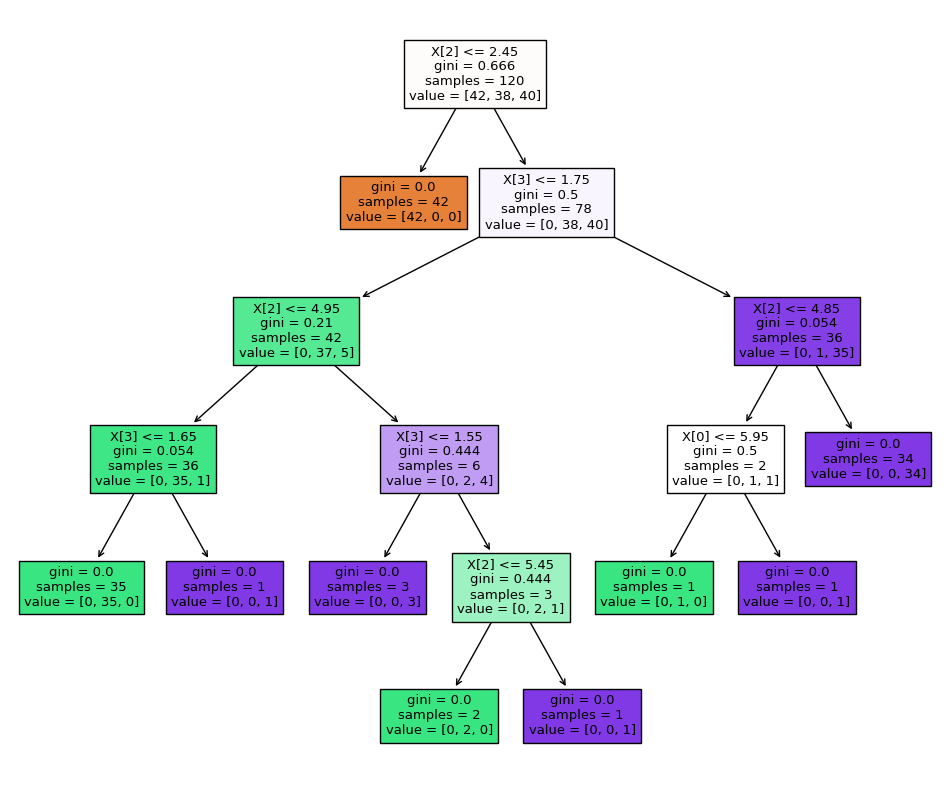

In [38]:
#for first model
plt.figure(figsize=[12,10])
tree.plot_tree(model,filled=True)

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

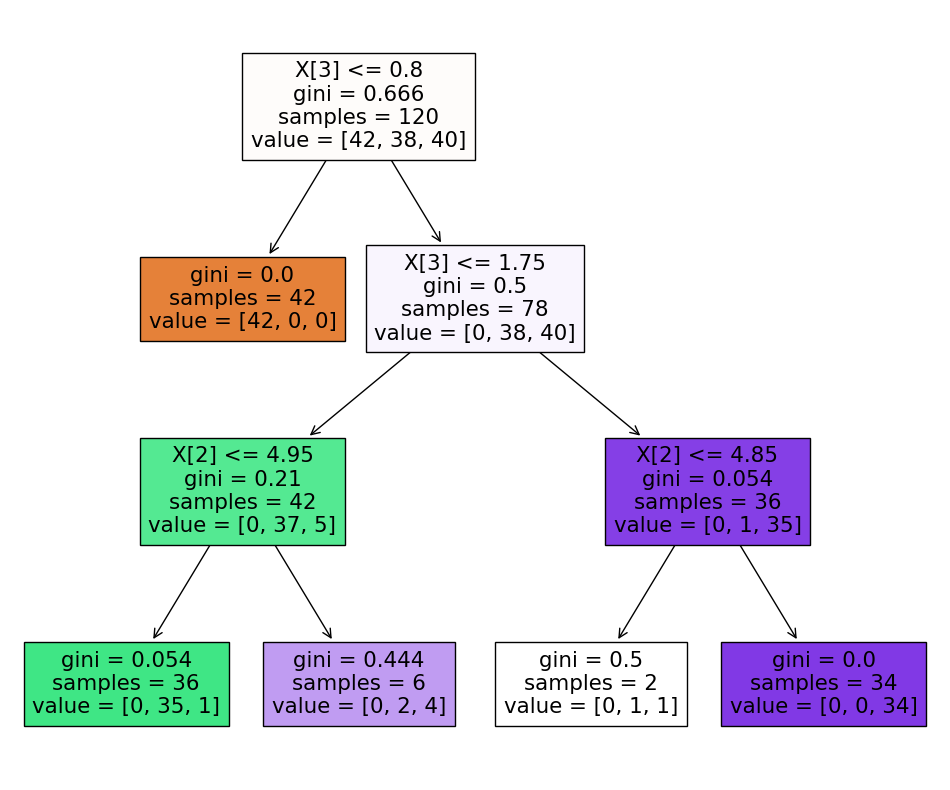

In [39]:
#for model2
plt.figure(figsize=[12,10])
tree.plot_tree(model2,filled=True)